# Thematic Analysis

## Import libraries and custom functions

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts.thematic_analysis import ThematicAnalysis
thematicAnalysis = ThematicAnalysis()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# Reading data for all bank apps
try:
    processed_df = pd.read_csv('../data/processed/processed_bank_app_reviews_with_sentiment.csv',)
except FileNotFoundError:
    print("Error: 'processed_bank_app_reviews_with_sentiment.csv' not found. Please run the previous code block first.")
    exit()

## Preprocessing the review text

In [3]:
# Apply preprocessing
print("Applying preprocessing to review text...")

# Remove Unnamed columns
processed_df = processed_df.loc[:, ~processed_df.columns.str.contains('^Unnamed')]

processed_df['cleaned_review'] = processed_df['review'].apply(thematicAnalysis.preprocess_text)

Applying preprocessing to review text...


## Extracting Keywords

In [4]:
# --- Keyword Extraction using TF-IDF ---
print("Extracting keywords using TF-IDF...")

# Extract keywords per bank
bank_keywords = {}
for bank in processed_df['bank'].unique():
    bank_reviews = processed_df[processed_df['bank'] == bank]['cleaned_review']
    
    print(f"\nExtracting keywords for {bank}:")
    keywords = thematicAnalysis.get_keyword(bank_reviews)

    keywords = ' '.join(keywords)
    print(f"Keywords for {bank}: {keywords}")

Extracting keywords using TF-IDF...

Extracting keywords for Commercial Bank of Ethiopia (CBE):

Top 100 common terms/phrases:
Keywords for Commercial Bank of Ethiopia (CBE): good app best nice ok good app like bank best app cbe great easy excellent use work fast wow network application banking one make easy use amazing screenshot great app mobile service sometimes nice app mobile banking ca apps well ነው need reliable using thank ever perfect useful በጣም life bad time everything developer working transfer fix banking app problem update transaction simple keep satisfied even account system please ግን smart week thankyou always happy money yes screen used issue support love fantastic awesome app ever special send security busy year take access option feature useful app better እና ጥሩ user simply every slow much try connection give 2025

Extracting keywords for Bank of Abyssinia (BOA):

Top 100 common terms/phrases:
Keywords for Bank of Abyssinia (BOA): good app best boa nice work bank workin

Extracting keywords using TF-IDF...

Extracting keywords for Commercial Bank of Ethiopia (CBE):

Top 100 common terms/phrases:


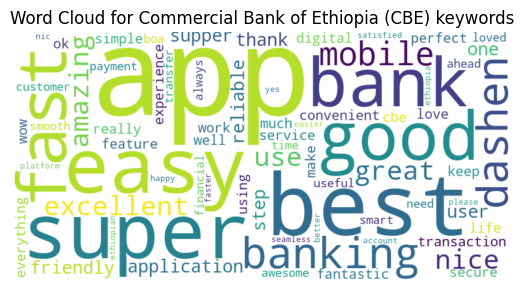


Extracting keywords for Bank of Abyssinia (BOA):

Top 100 common terms/phrases:


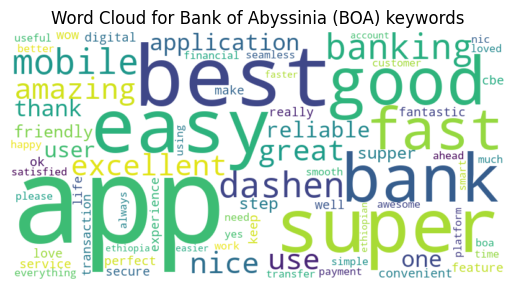


Extracting keywords for Dashen Bank:

Top 100 common terms/phrases:


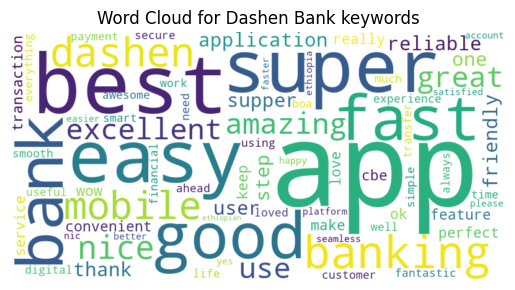

In [5]:
# --- Keyword Extraction using TF-IDF ---
print("Extracting keywords using TF-IDF...")

# Extract keywords per bank
bank_keywords = {}
for bank in processed_df['bank'].unique():
    positive_reviews = processed_df[processed_df['distilbert_label'] == 'POSITIVE']['cleaned_review']
    
    print(f"\nExtracting keywords for {bank}:")
    keywords = thematicAnalysis.get_keyword(positive_reviews)

    keywords = ' '.join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {bank} keywords')
    plt.show()

Extracting keywords using TF-IDF...

Extracting keywords for Commercial Bank of Ethiopia (CBE):

Top 100 common terms/phrases:


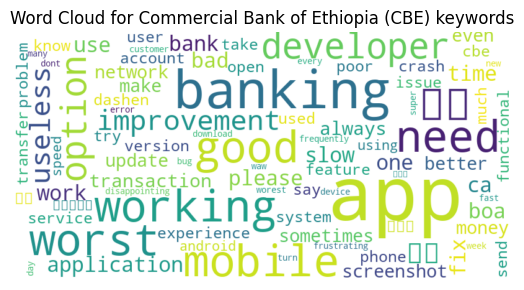


Extracting keywords for Bank of Abyssinia (BOA):

Top 100 common terms/phrases:


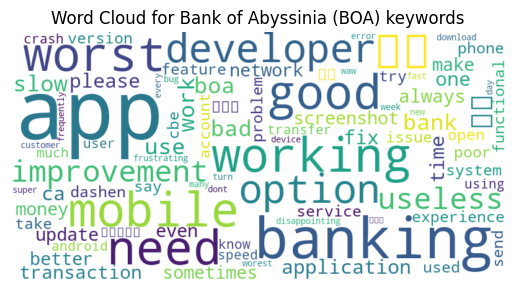


Extracting keywords for Dashen Bank:

Top 100 common terms/phrases:


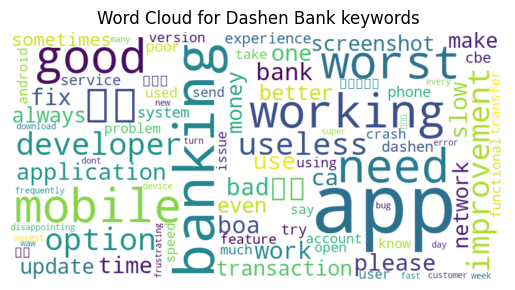

In [6]:
# --- Keyword Extraction using TF-IDF ---
print("Extracting keywords using TF-IDF...")

# Extract keywords per bank
bank_keywords = {}
for bank in processed_df['bank'].unique():
    negative_reviews = processed_df[processed_df['distilbert_label'] == 'NEGATIVE']['cleaned_review']
    
    print(f"\nExtracting keywords for {bank}:")
    keywords = thematicAnalysis.get_keyword(negative_reviews)

    keywords = ' '.join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {bank} keywords')
    plt.show()

## Theme Assigning


Grouping keywords into manual themes...

Clustering themes for Commercial Bank of Ethiopia (CBE):
                               Theme  Count
1  User Interface/Experience (UI/UX)    139
2                 Transaction Issues     27
3        Account Access/Login Issues     17
4    Features/Functionality Requests     17
5           Customer Support/Service      7


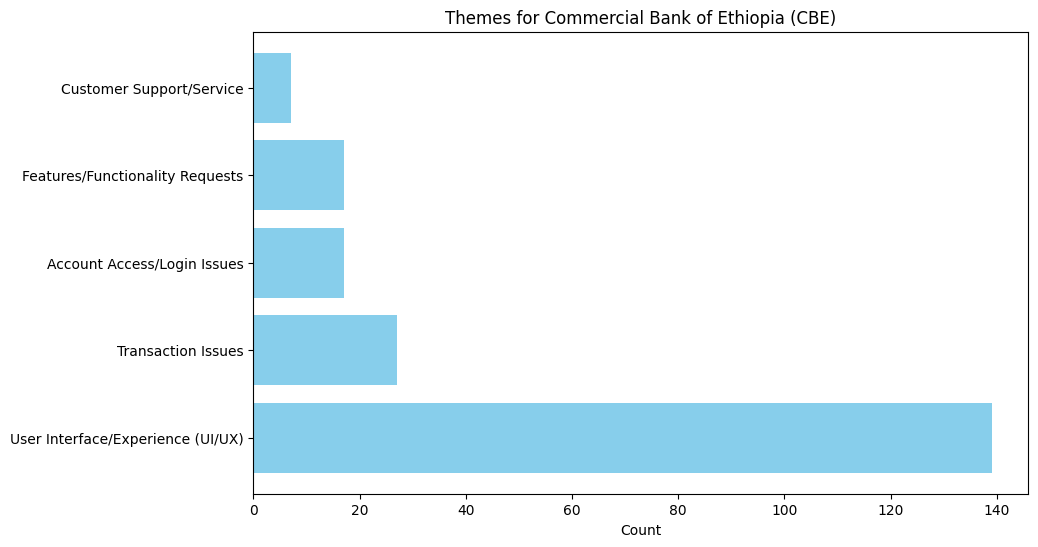


Clustering themes for Bank of Abyssinia (BOA):
                               Theme  Count
1  User Interface/Experience (UI/UX)    153
2                 Transaction Issues     37
3    Features/Functionality Requests     26
4        Account Access/Login Issues     11
5           Customer Support/Service      9


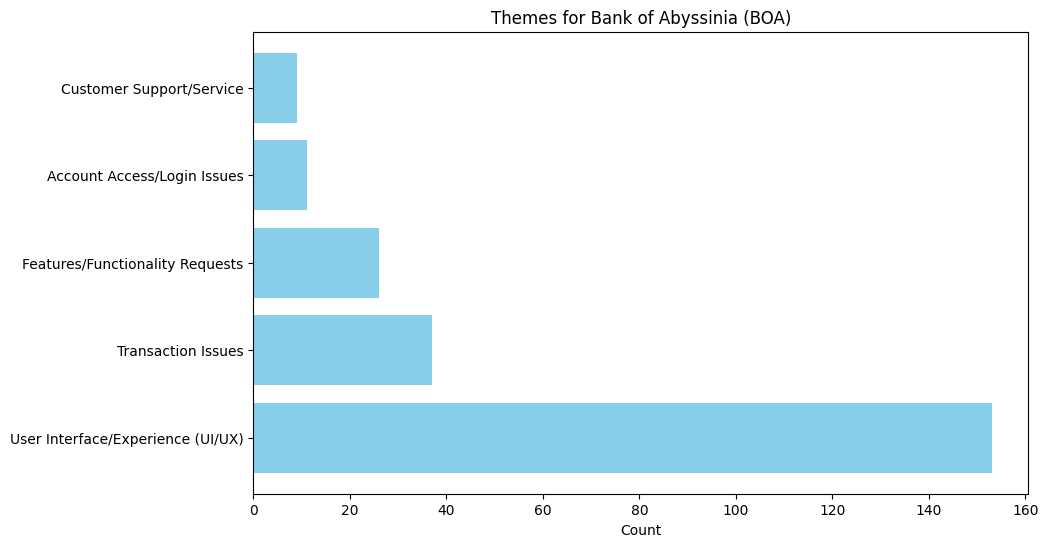


Clustering themes for Dashen Bank:
                               Theme  Count
0  User Interface/Experience (UI/UX)    213
2                 Transaction Issues     65
3    Features/Functionality Requests     56
4        Account Access/Login Issues     20
5           Customer Support/Service     13


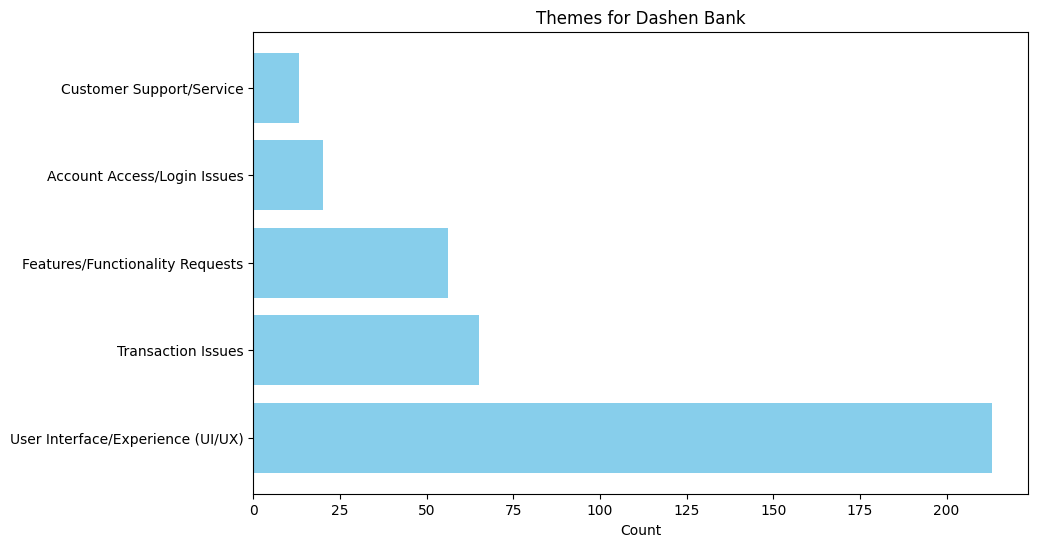

In [7]:
# --- Manual/Rule-Based Clustering of Keywords into Themes ---
print("\nGrouping keywords into manual themes...")

# Apply theme assignment
processed_df['identified_theme(s)'] = processed_df['cleaned_review'].apply(thematicAnalysis.assign_themes)

# Cluster into 3–5 themes per bank
for bank in processed_df['bank'].unique():
    print(f"\nClustering themes for {bank}:")
    bank_reviews = processed_df[processed_df['bank'] == bank]

    bank_reviews = bank_reviews.copy()

    bank_reviews['identified_theme(s)'] = bank_reviews['identified_theme(s)'].apply(
        lambda x: x if isinstance(x, list) else [x]
    )

    # Explode the lists into separate rows
    exploded = bank_reviews.explode('identified_theme(s)')

    # Count each theme
    theme_counts = exploded['identified_theme(s)'].value_counts().reset_index()
    theme_counts.columns = ['Theme', 'Count']
    # Remove General themes
    theme_counts = theme_counts[~theme_counts['Theme'].str.contains('General', case=False)]
    print(theme_counts)

    # plotting the themes
    plt.figure(figsize=(10, 6))
    plt.barh(theme_counts['Theme'], theme_counts['Count'], color='skyblue')
    plt.xlabel('Count')
    plt.title(f'Themes for {bank}')
    plt.show()   


In [8]:
processed_df

,review,rating,date,bank,source,distilbert_sentiment,distilbert_label,distilbert_score,vader_sentiment,textblob_sentiment,distilbert_numerical,cleaned_review,identified_theme(s)
0,20 years,5,2025-06-08,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.991589,neutral,neutral,1,20 year,[General]
1,A great app. It's like carrying a bank in your...,4,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999293,positive,positive,1,great app like carrying bank pocket,[User Interface/Experience (UI/UX)]
2,More than garrantty bank EBC.,4,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.997196,neutral,positive,1,garrantty bank ebc,[General]
3,really am happy to this app it is Siple to use...,5,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.998870,positive,positive,1,really happy app siple use everything,[User Interface/Experience (UI/UX)]
4,I liked this app. But the User interface is ve...,2,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'NEGATIVE', 'score_di...",NEGATIVE,0.999684,negative,positive,-1,liked app user interface basic attractive,[User Interface/Experience (UI/UX)]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wow,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999592,positive,positive,1,wow,[General]
1196,Dashen yichalal. Ewnetem one step a head,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'NEGATIVE', 'score_di...",NEGATIVE,0.983263,neutral,neutral,-1,dashen yichalal ewnetem one step head,[General]
1197,It has a Good performance but need more upgrad...,4,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.996793,positive,positive,1,good performance need upgrade performance like...,[Account Access/Login Issues]
1198,It is a very wonderful work that has saved its...,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999881,positive,positive,1,wonderful work saved time always one step ahead,[General]


In [9]:
print("\nDataFrame with sentiment scores:")
display(processed_df)


DataFrame with sentiment scores:


,review,rating,date,bank,source,distilbert_sentiment,distilbert_label,distilbert_score,vader_sentiment,textblob_sentiment,distilbert_numerical,cleaned_review,identified_theme(s)
0,20 years,5,2025-06-08,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.991589,neutral,neutral,1,20 year,[General]
1,A great app. It's like carrying a bank in your...,4,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999293,positive,positive,1,great app like carrying bank pocket,[User Interface/Experience (UI/UX)]
2,More than garrantty bank EBC.,4,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.997196,neutral,positive,1,garrantty bank ebc,[General]
3,really am happy to this app it is Siple to use...,5,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.998870,positive,positive,1,really happy app siple use everything,[User Interface/Experience (UI/UX)]
4,I liked this app. But the User interface is ve...,2,2025-06-07,Commercial Bank of Ethiopia (CBE),Google Play Store,"{'sentiment_distilbert': 'NEGATIVE', 'score_di...",NEGATIVE,0.999684,negative,positive,-1,liked app user interface basic attractive,[User Interface/Experience (UI/UX)]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Wow,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999592,positive,positive,1,wow,[General]
1196,Dashen yichalal. Ewnetem one step a head,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'NEGATIVE', 'score_di...",NEGATIVE,0.983263,neutral,neutral,-1,dashen yichalal ewnetem one step head,[General]
1197,It has a Good performance but need more upgrad...,4,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.996793,positive,positive,1,good performance need upgrade performance like...,[Account Access/Login Issues]
1198,It is a very wonderful work that has saved its...,5,2025-01-17,Dashen Bank,Google Play Store,"{'sentiment_distilbert': 'POSITIVE', 'score_di...",POSITIVE,0.999881,positive,positive,1,wonderful work saved time always one step ahead,[General]


In [10]:
# --- Finalizing the Output DataFrame ---

## Add review_id for tracking
processed_df['review_id'] = processed_df.index + 1

# Select and reorder the columns for the final CSV
final_output_df = processed_df[['review_id', 'review', 'distilbert_label', 'distilbert_score', 'identified_theme(s)']]

# Rename sentiment columns for clarity if needed
final_output_df = final_output_df.rename(columns={
    'review': 'review_text',
    'distilbert_label': 'sentiment_label',
    'distilbert_score': 'sentiment_score'
})

print("\nFinal Output DataFrame head:")
display(final_output_df.head())


Final Output DataFrame head:


,review_id,review_text,sentiment_label,sentiment_score,identified_theme(s)
0,1,20 years,POSITIVE,0.991589,[General]
1,2,A great app. It's like carrying a bank in your...,POSITIVE,0.999293,[User Interface/Experience (UI/UX)]
2,3,More than garrantty bank EBC.,POSITIVE,0.997196,[General]
3,4,really am happy to this app it is Siple to use...,POSITIVE,0.998870,[User Interface/Experience (UI/UX)]
4,5,I liked this app. But the User interface is ve...,NEGATIVE,0.999684,[User Interface/Experience (UI/UX)]


In [11]:
# --- Save the Final Result to CSV ---
if not final_output_df.empty:
    final_output_df.to_csv('../data/processed/review_topics_and_sentiment.csv', index=False)
    print("\nFinal results saved to review_topics_and_sentiment.csv")


Final results saved to review_topics_and_sentiment.csv
